In [ ]:
!pip install tensorflow opencv-python matplotlib

In [146]:
import tensorflow as tf
import os

In [147]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [148]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [149]:
data_dir='data'
image_ext=['jpeg','jpg','bmp','png']

In [ ]:
for image_file in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_file)):
        image_loc= os.path.join(data_dir,image_file,image)
        try:
            img=cv2.imread(image_loc)
            tip=imghdr.what(image_loc)
            if tip not in image_ext:
                print('image not ext list{}'.format(image_loc))
                os.remove(image_loc)
        except Exception as e:
            print('issue with image{}'.format(image_loc))
                 

In [ ]:
tf.data.Dataset??

In [154]:
import numpy as np

In [155]:
data =tf.keras.utils.image_dataset_from_directory('data')

Found 624 files belonging to 2 classes.


In [156]:
data_iter=data.as_numpy_iterator()

In [157]:
batch=data_iter.next()

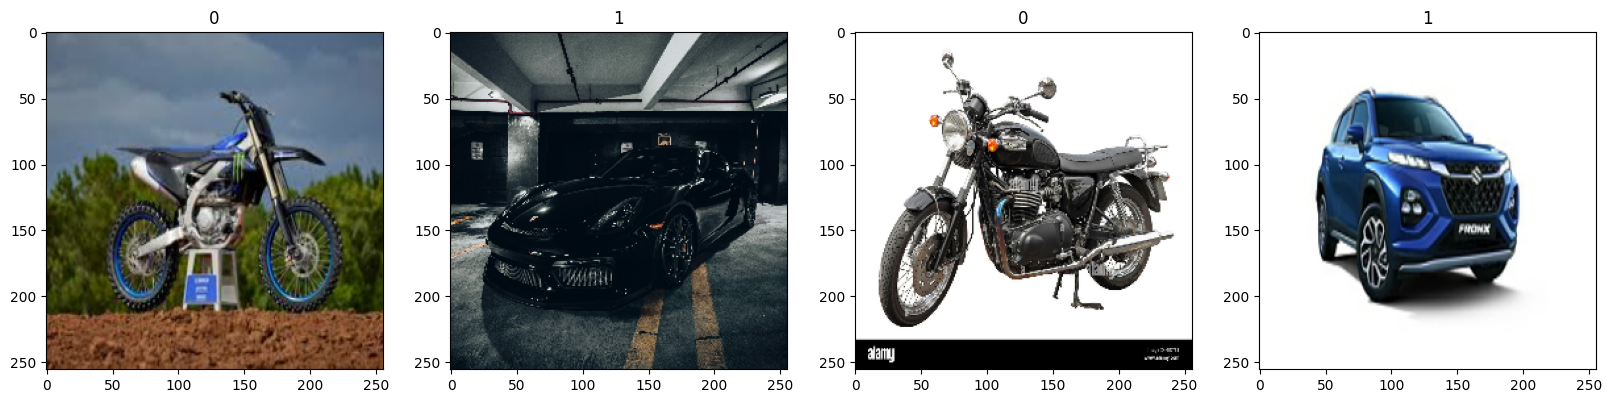

In [158]:
#1=car,0=bike
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0] [:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [159]:
data =data.map(lambda x,y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()

In [164]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*1)+1

In [165]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [167]:
model=Sequential()

In [168]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [169]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [170]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [171]:
logdir='logs'

In [172]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [173]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5915 - loss: 1.6524 - val_accuracy: 0.7063 - val_loss: 0.6352
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7504 - loss: 0.5943 - val_accuracy: 0.8313 - val_loss: 0.4351
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8619 - loss: 0.4063 - val_accuracy: 0.8813 - val_loss: 0.3223
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9163 - loss: 0.2785 - val_accuracy: 0.9062 - val_loss: 0.2478
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9050 - loss: 0.2110 - val_accuracy: 0.9000 - val_loss: 0.2288
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9555 - loss: 0.1457 - val_accuracy: 0.9563 - val_loss: 0.1376
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9805 - loss: 0.0806 - val_accuracy: 0.9625 - val_loss: 0.0818
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9783 - loss: 0.0690 - val_accuracy: 0.9563 - val_loss:

<function matplotlib.pyplot.show(close=None, block=None)>

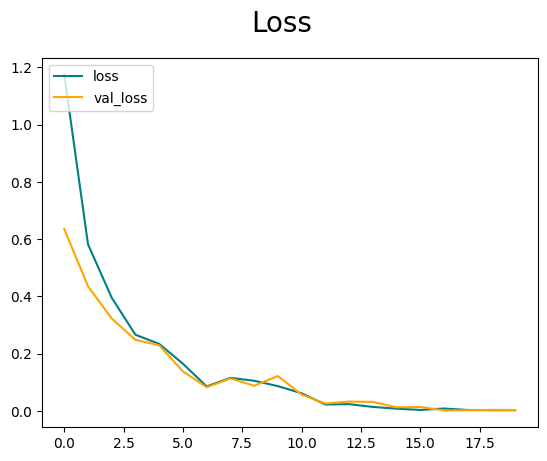

In [174]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

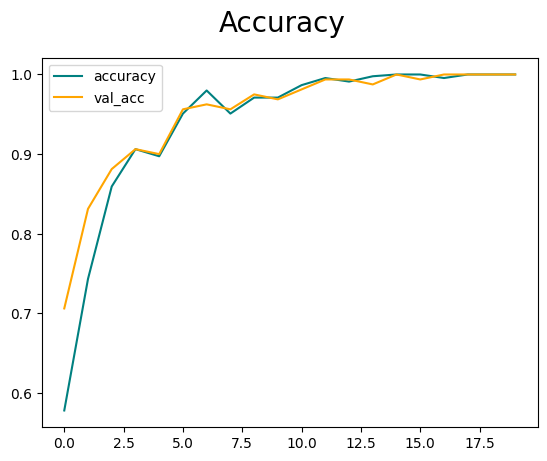

In [175]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_acc')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show

In [176]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [177]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [179]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [180]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


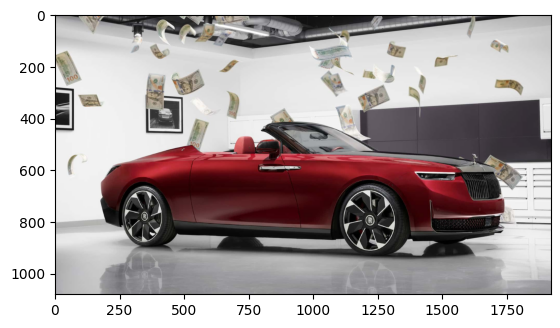

In [189]:
img=cv2.imread('imagecar.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

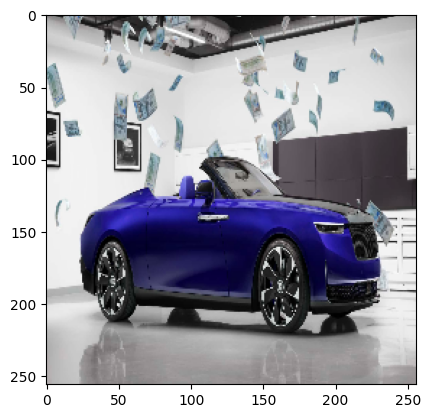

In [190]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [191]:
np.expand_dims(resize,0)

array([[[[131.60938, 131.60938, 131.60938],
         [129.60938, 129.60938, 129.60938],
         [129.96875, 124.96875, 125.96875],
         ...,
         [165.60938, 165.60938, 165.60938],
         [165.60938, 165.60938, 165.60938],
         [167.     , 167.     , 167.     ]],

        [[137.82812, 137.82812, 137.82812],
         [136.65625, 136.65625, 136.65625],
         [140.40625, 135.40625, 136.40625],
         ...,
         [168.82812, 168.82812, 168.82812],
         [168.82812, 168.82812, 168.82812],
         [167.     , 167.     , 167.     ]],

        [[148.22266, 148.22266, 148.22266],
         [143.15234, 143.15234, 143.15234],
         [145.03516, 140.03516, 141.03516],
         ...,
         [171.     , 171.     , 171.     ],
         [171.     , 171.     , 171.     ],
         [171.     , 171.     , 171.     ]],

        ...,

        [[176.     , 171.     , 172.     ],
         [178.     , 173.     , 174.     ],
         [179.     , 174.     , 175.     ],
         ...,


In [192]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [193]:
if yhat>0.5:
    print(f'car')
else:
    print(f'bike')

car


In [187]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','carorbikemodel.h5'))